## Problem Description

A Chinese automobile company aspires to enter the US market by setting up their
manufacturing unit there and producing cars locally to give competition to their US and
European counterparts. They have contracted an automobile consulting company to
understand the factors on which the pricing of cars depends. Specifically, they want to
understand the factors affecting the pricing of cars in the American market, since those may
be very different from the Chinese market. Essentially, the company wants to know:
• Which variables are significant in predicting the price of a car
• How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different
types of cars across the American market.

#### Business Goal
You are required to model the price of cars with the available independent variables. It will be
used by the management to understand how exactly the prices vary with the independent
variables. They can accordingly manipulate the design of the cars, the business strategy etc. to
meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data into df variable
df = pd.read_csv(r"C:\Entri\ML_Projects\Linear Regression Project\CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Data Exploration

In [3]:
df.shape

(205, 26)

There are 205 rows and 26 columns in the dataset.

In [4]:
#Features of the dataset
df.columns.to_list()

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [5]:
# Insights on structure of dataframe - null or missing values in each feature and datatypes of the features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#Statistical summary of numerical parameters
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [7]:
#Categorical and numerical features in the dataset
print("Categorical columns are:\n\n",df.select_dtypes(include=['object']).columns.to_list())
print("\nNumerical columns are:\n\n",df.select_dtypes(exclude=['object']).columns.to_list())

Categorical columns are:

 ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

Numerical columns are:

 ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [8]:
# Identifying unique values in each feature and finding its length
for column in df.columns:
    print('\033[1m',column,'\033[0m')
    print("Unique Values:",df[column].unique())
    print("Length:",df[column].nunique(),"\n")

 car_ID 
Unique Values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
Length: 205 

 symboling 
Unique Values: [ 3  1  2  0 -1 -2]
Length: 6 

 CarName 
Unique Values: ['alfa-romero giulia' 'alfa-romero stelvio' '

### Data Cleaning

#### Identifying null values

In [9]:
# Identifying null values in the dataframe
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no null values in the dataset

#### Duplicate Rows

In [10]:
#Identifying duplicate rows
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


There are no duplicate rows in the dataset.

In [11]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


'CarName' column has information on company name and model name. In each value of this column company names are first part of the string which will be retained for further analysis.

In [12]:
# Extracting Car company names from 'CarName' column
df1 = df
df1['CarName'] = df1['CarName'].apply(lambda x: x.split(" ")[0])

In [14]:
# Renaming 'CarName' column as 'CarCompany'
df1.rename(columns={'CarName': 'CarCompany'}, inplace=True)
df1

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
# Unique car company names
df1['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Some car company names have been duplicated with incorrect spelling and these values have to be corrected for further analysis.

In [16]:
#Replacing incorrect spellings
df1['CarCompany'].replace({'alfa-romero':'alfa-romeo',
                                                   'maxda': 'mazda',
                                                   'Nissan': 'nissan',
                                                   'porcshce':'porsche',
                                                   'toyouta': 'toyota',
                                                   'vokswagen': 'volkswagen',
                                                   'vw': 'volkswagen'                                                
                                                  },inplace=True)

In [17]:
#Unique car company names after replacing incorrect spellings
df1.CarCompany.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
# Removing column Car_ID as it is not of much relevance 
df1.drop(columns=['car_ID'], inplace=True)
df1.head(2)

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


### Data Analysis

#### Analysis of categorical features

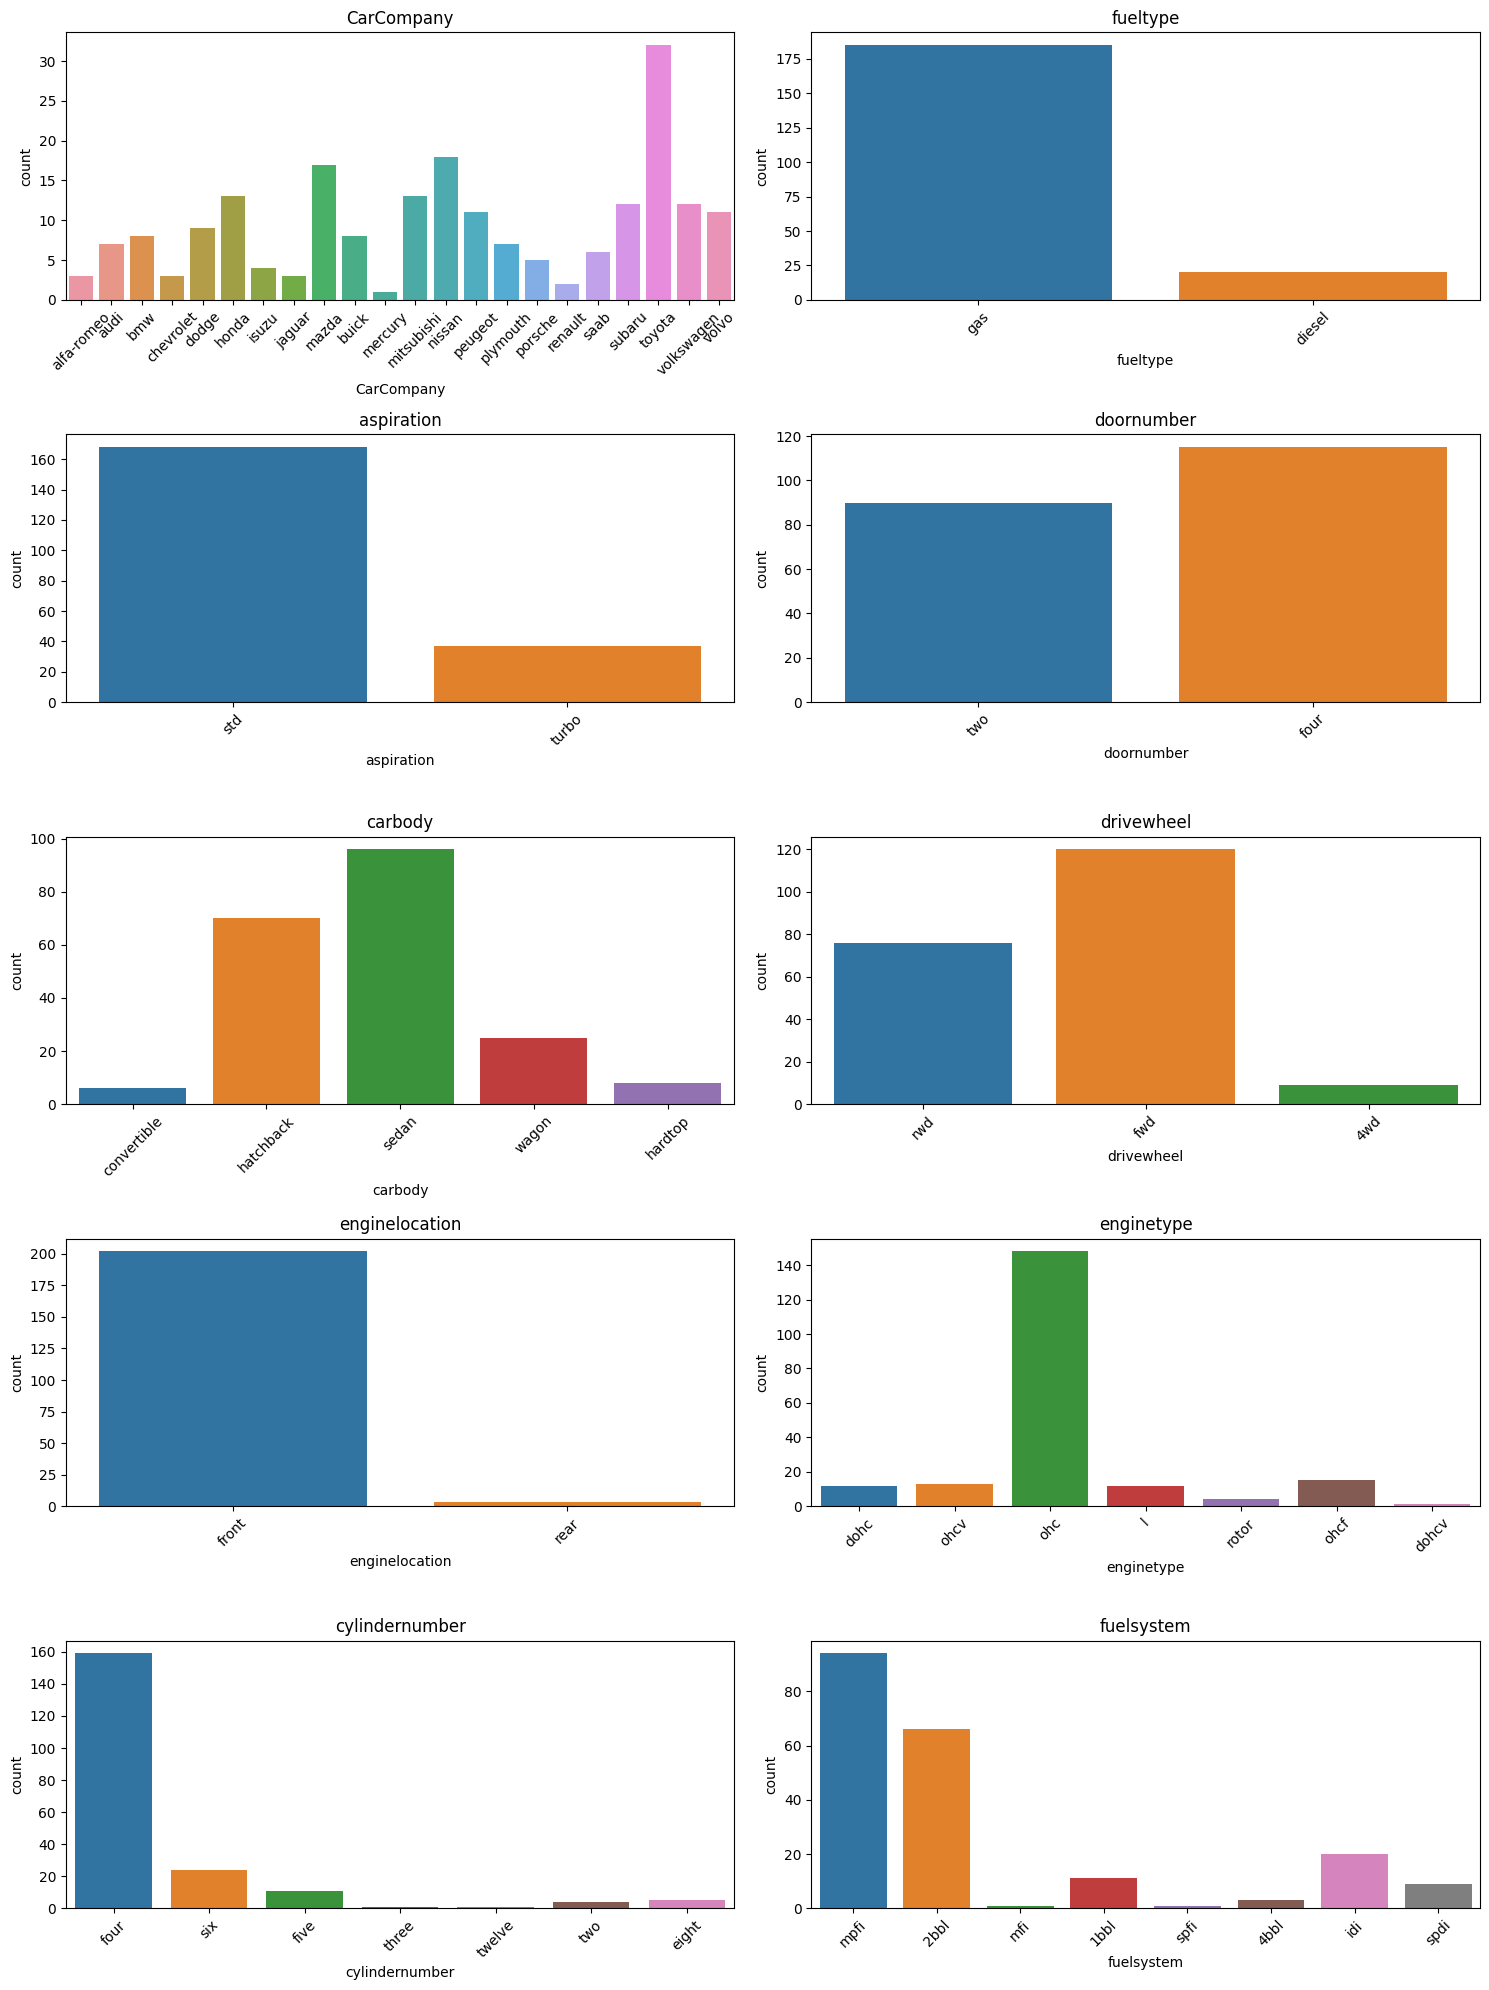

In [19]:
categorical_columns = ['CarCompany', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

plt.figure(figsize=(15, 20))
num_columns = len(categorical_columns)

# countplots for each categorical column
for idx, column in enumerate(categorical_columns, start=1):
    plt.subplot(num_columns // 2 + num_columns % 2, 2, idx)
    sns.countplot(data=df1, x=column)
    plt.xticks(rotation=45)
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

- The brand 'Toyota' is evidently the most preferred in the market.
- A majority of cars in the dataset are powered by gasoline (gas) fuel type.
- The standard aspiration type is predominant among the car models.
- There are more 4-door car models than 2-door models.
- Among the various car body styles, sedan stands out as the most prevalent, while convertible appears to be the least preferred.
- The front-wheel drive configuration appears more frequently, while the 4-wheel drive option is rarely encountered.
- Engine placement at the front is the dominant choice among the models.
- The 'ohc' (overhead camshaft) engine type is the most common among various models.
- Majority of cars feature a 4-cylinder engine configuration.
- 'mpfi' (multi-point fuel injection) and '2bbl' (two-barrel carburetor) fuel systems are the predominant choices among the models.

#### Distribution of numerical features

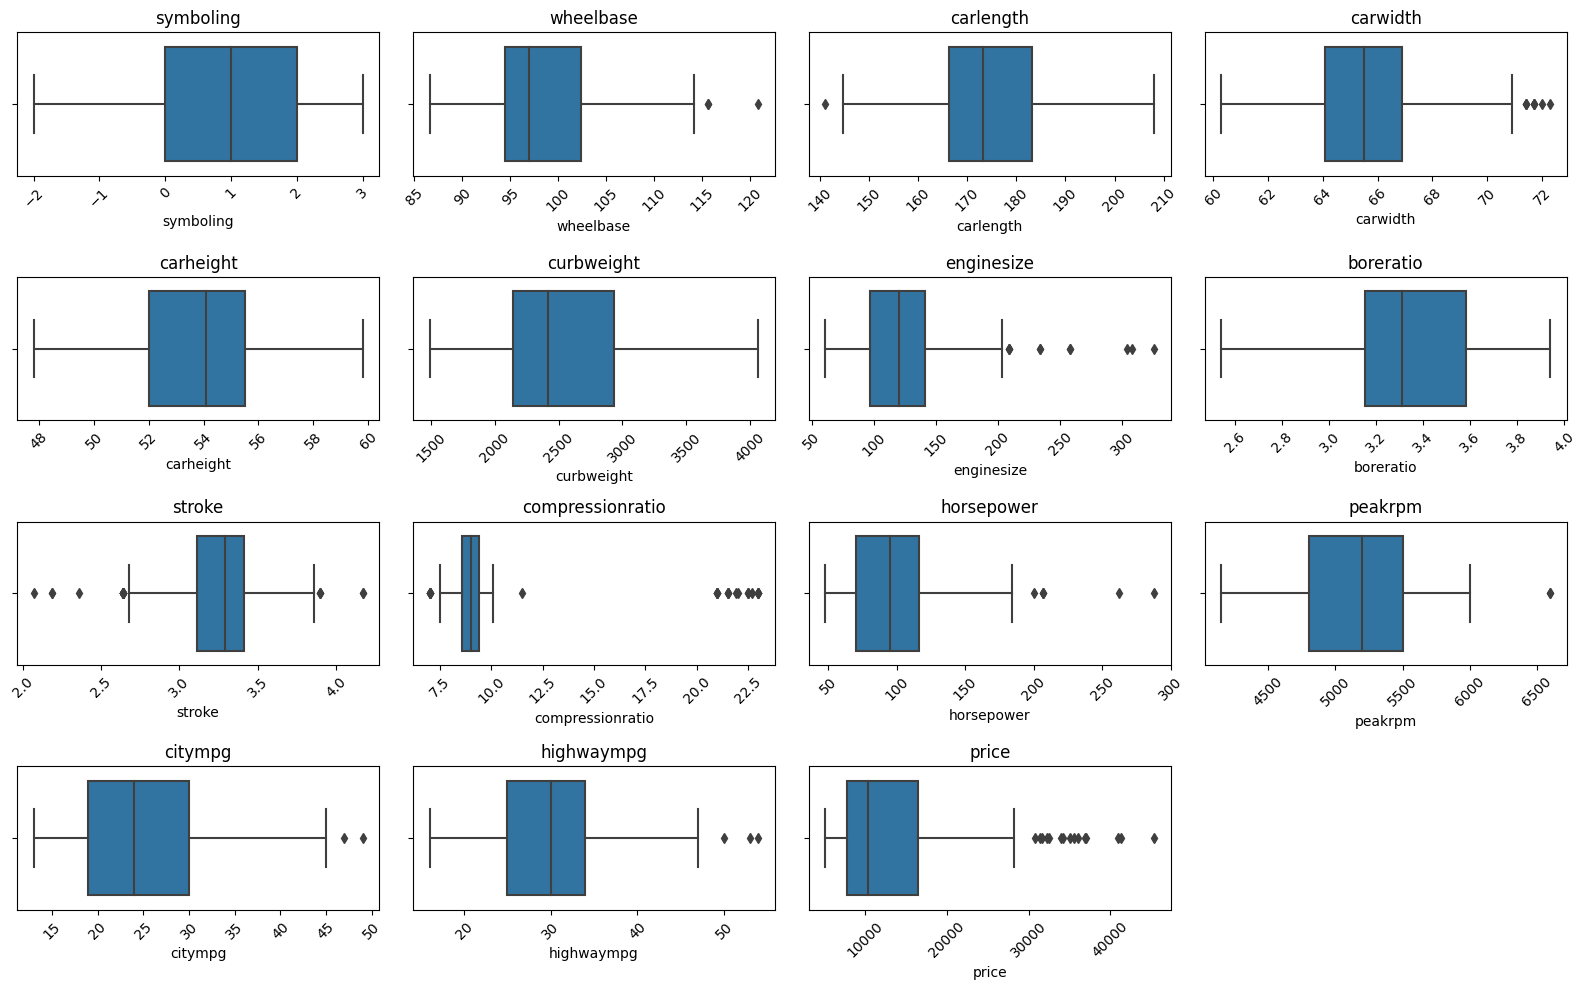

In [20]:
numerical_columns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 
                     'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 
                     'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(16, 10)) 

for column in numerical_columns:
    plt.subplot(4, 4, numerical_columns.index(column) + 1)
    sns.boxplot(x=column, data=df1)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Extreme values can be seen in the price column and the distribution is skewed to the right. This is due to the presence of few luxurious cars in the market.
- Similarly cars with larger engine size, higher horsepower etc. is less common and therefore the distribution is skewed to the right.

#### Correlation between numerical features

In [21]:
numerical_columns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 
                     'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 
                     'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

subset_df = df1[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


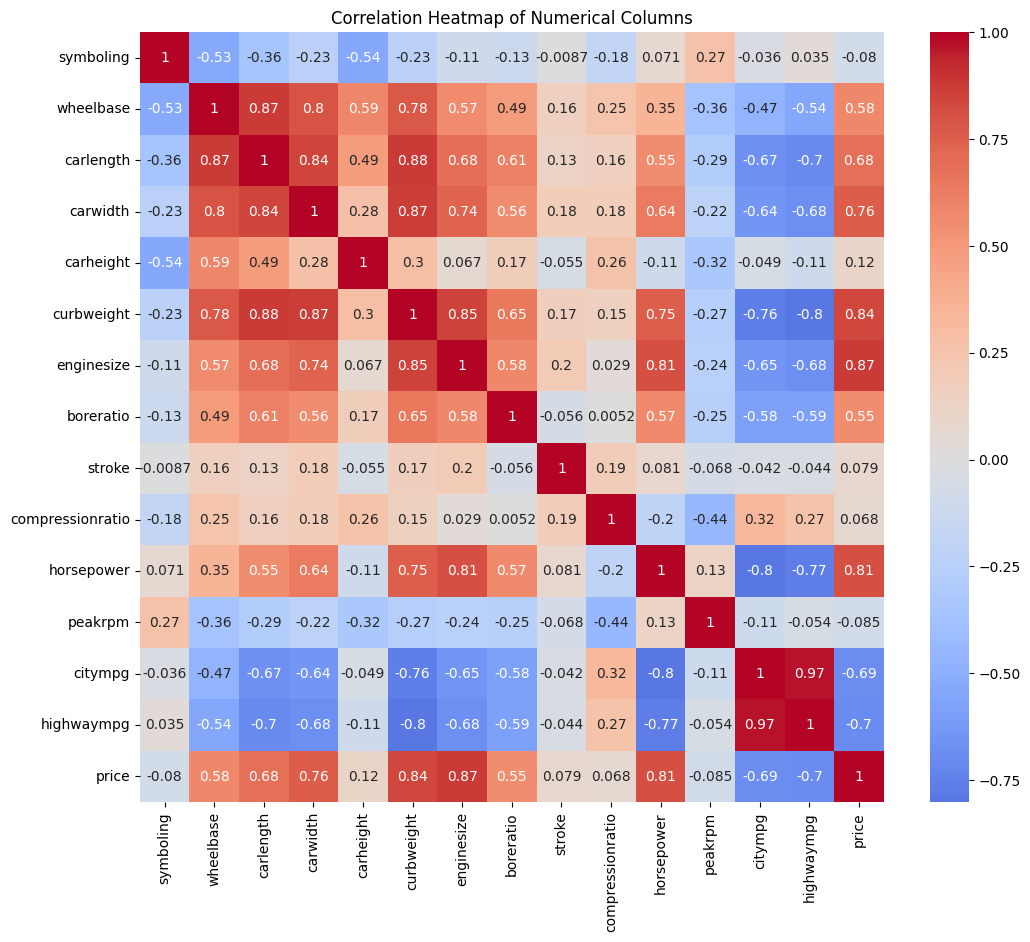

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

#### Price Vs Numerical Features

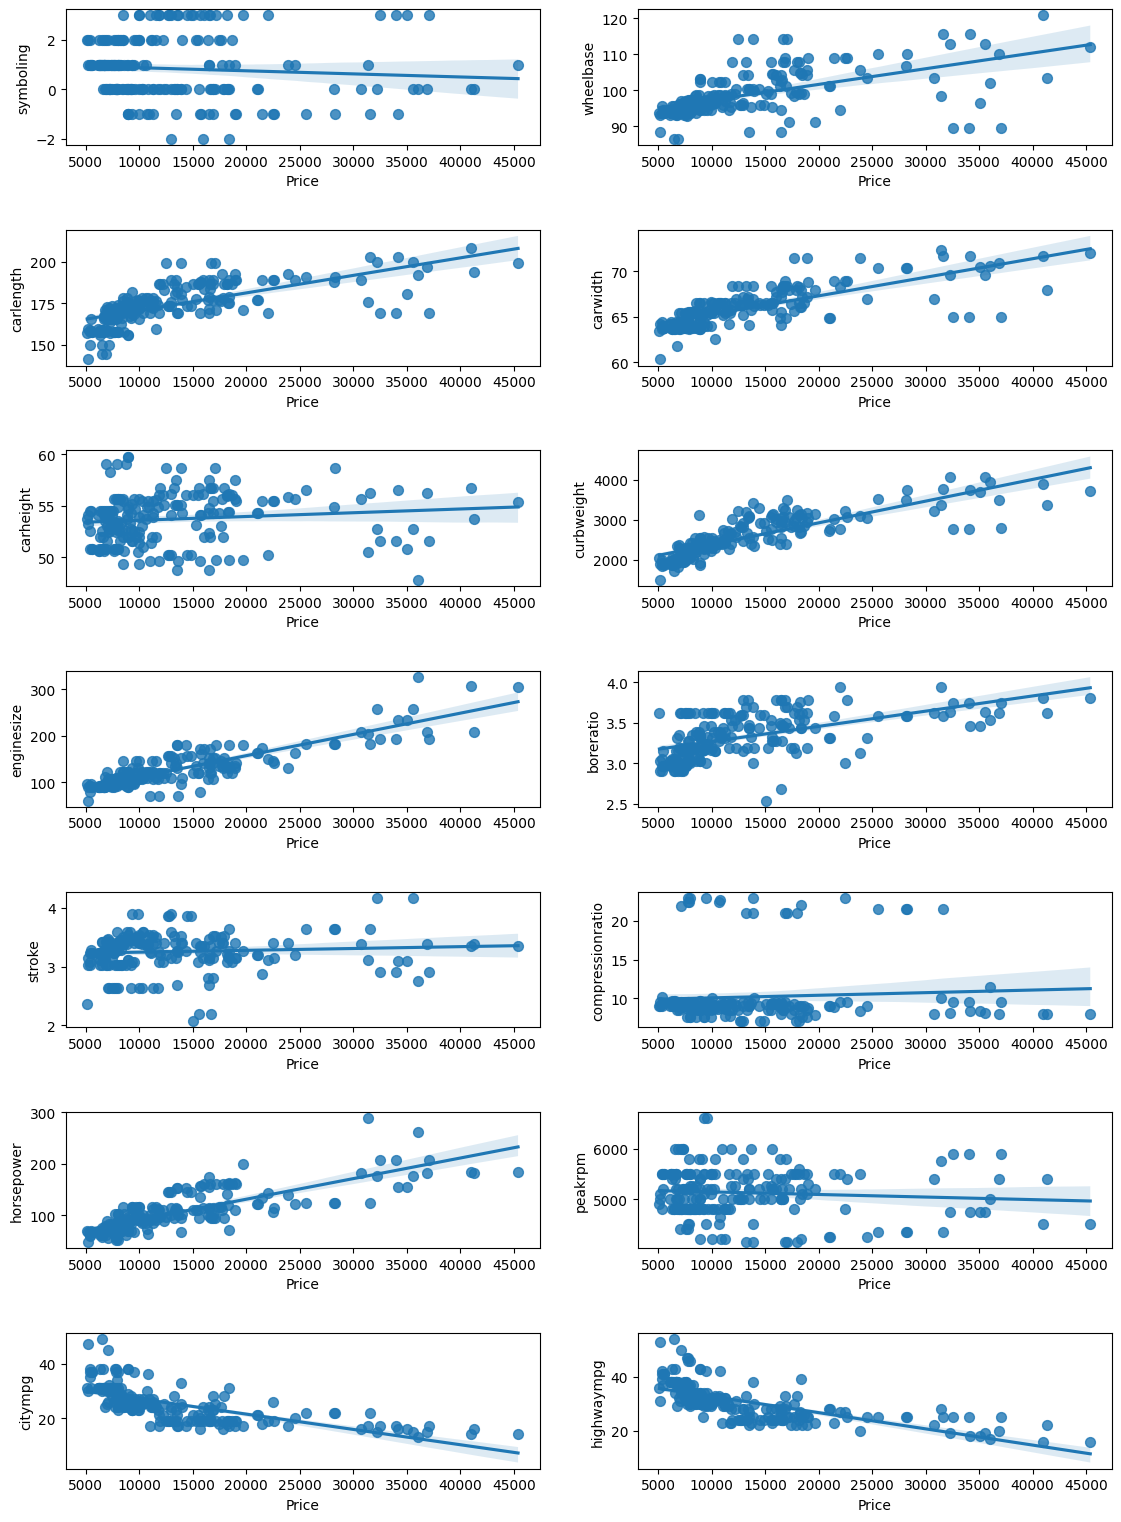

In [23]:
numerical_features = [
    'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
    'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
    'horsepower', 'peakrpm', 'citympg', 'highwaympg'
]

# Calculate the number of rows and columns for the subplot grid
num_rows = (len(numerical_features) + 1) // 2
num_cols = 2

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 16))
fig.tight_layout(pad=4.0)

# Iterate through numerical features and plot on subplots
for idx, feature in enumerate(numerical_features):
    row = idx // num_cols
    col = idx % num_cols   
    sns.regplot(data=df1, x='price', y=feature, scatter_kws={'s': 50}, ax=axes[row, col])
    axes[row, col].set_xlabel('Price')
    axes[row, col].set_ylabel(feature)
    
# Hide any empty subplots
for idx in range(len(numerical_features), num_rows * num_cols):
    row = idx // num_cols
    col = idx % num_cols
    fig.delaxes(axes[row, col])

plt.show()

Price is positively correlated with wheelbase, carlength, carwidth, curbweight, boreratio, enginesize and horsepower.
Also, price is negatively correlated to citympg and highwaympg (-0.70 approximately).

In [24]:
df1.head(2)

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [25]:
# Calculating average car mileage and replacing 'citympg' and 'highwaympg' with average mileage
df1['average_mileage'] = (df1['citympg'] + df1['highwaympg']) / 2
df1.drop(['citympg', 'highwaympg'], axis=1,inplace=True)
df1.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,average_mileage
0,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,24.0
1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,24.0
2,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.5
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,27.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,20.0


#### Price Vs Categorical Features

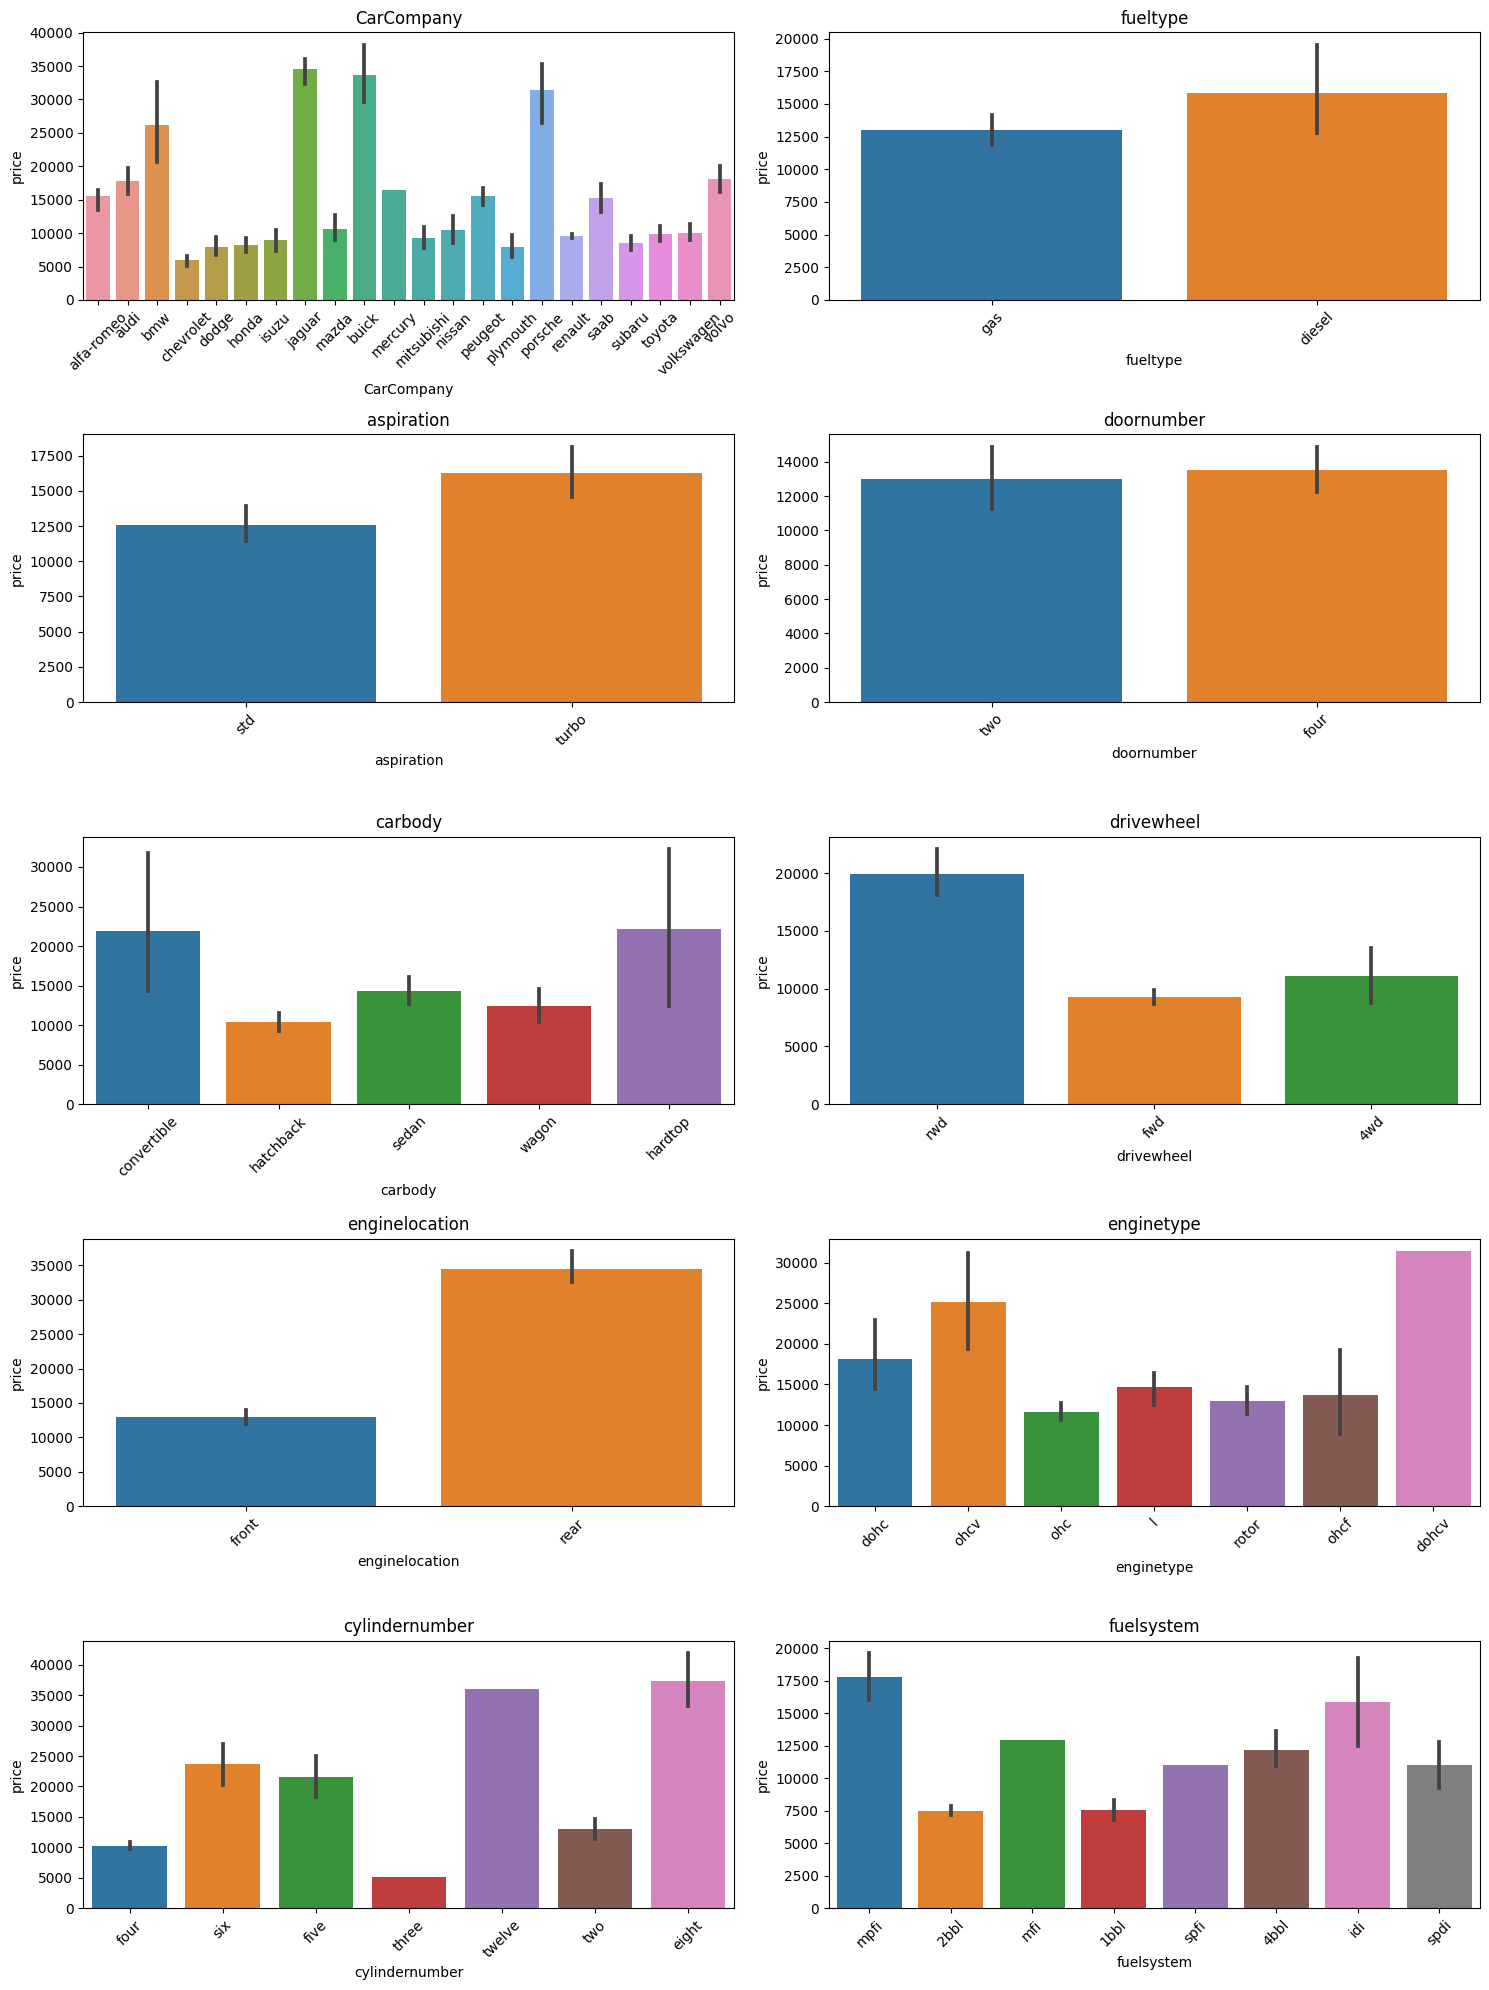

In [26]:
categorical_columns = ['CarCompany', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

plt.figure(figsize=(15, 20))
num_columns = len(categorical_columns)

# countplots for each categorical column
for idx, column in enumerate(categorical_columns, start=1):
    plt.subplot(num_columns // 2 + num_columns % 2, 2, idx)
    sns.barplot(data=df1, x=column, y='price')
    plt.xticks(rotation=45)
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

### Encoding categorical features

In [27]:
df1.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,average_mileage
0,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,24.0
1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,24.0
2,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.5
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,27.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,20.0


In [28]:
#categorical columns in the dataset
print("Categorical columns are:\n\n",df1.select_dtypes(include=['object']).columns.to_list())

Categorical columns are:

 ['CarCompany', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
# Applying label encoding on features which has only two values 

# Columns for label encoding
label_encoding_columns = ['fueltype', 'aspiration', 'doornumber','enginelocation']

# Applying label encoding
label_encoder = LabelEncoder()
for col in label_encoding_columns:
    df1[col] = label_encoder.fit_transform(df1[col])

In [31]:
#label encoded columns
df1[['fueltype', 'aspiration', 'doornumber','enginelocation']]

,fueltype,aspiration,doornumber,enginelocation
0,1,0,1,0
1,1,0,1,0
2,1,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
200,1,0,0,0
201,1,1,0,0
202,1,0,0,0
203,0,1,0,0


In [32]:
#Applying one hot encoding to remaining columns
#['CarCompany','carbody', 'drivewheel','enginetype', 'cylindernumber', 'fuelsystem']
encoded_columns = pd.get_dummies(df1[['CarCompany','carbody','drivewheel','enginetype','cylindernumber','fuelsystem']]).astype(int)
encoded_columns

,CarCompany_alfa-romeo,CarCompany_audi,CarCompany_bmw,CarCompany_buick,CarCompany_chevrolet,CarCompany_dodge,CarCompany_honda,CarCompany_isuzu,CarCompany_jaguar,CarCompany_mazda,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
# Concatenating the original dataframe df1 and encoded_columns to a new dataframe df_encoded
df_encoded = pd.concat([df1,encoded_columns],axis=1)
df_encoded.drop(['CarCompany','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'],axis=1,inplace=True)
df_encoded

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,0,109.1,188.8,68.9,55.5,2952,...,0,0,0,0,0,0,0,1,0,0
201,-1,1,1,0,0,109.1,188.8,68.8,55.5,3049,...,0,0,0,0,0,0,0,1,0,0
202,-1,1,0,0,0,109.1,188.8,68.9,55.5,3012,...,0,0,0,0,0,0,0,1,0,0
203,-1,0,1,0,0,109.1,188.8,68.9,55.5,3217,...,0,0,0,0,0,1,0,0,0,0


In [34]:
df_encoded.columns.to_list()

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'price',
 'average_mileage',
 'CarCompany_alfa-romeo',
 'CarCompany_audi',
 'CarCompany_bmw',
 'CarCompany_buick',
 'CarCompany_chevrolet',
 'CarCompany_dodge',
 'CarCompany_honda',
 'CarCompany_isuzu',
 'CarCompany_jaguar',
 'CarCompany_mazda',
 'CarCompany_mercury',
 'CarCompany_mitsubishi',
 'CarCompany_nissan',
 'CarCompany_peugeot',
 'CarCompany_plymouth',
 'CarCompany_porsche',
 'CarCompany_renault',
 'CarCompany_saab',
 'CarCompany_subaru',
 'CarCompany_toyota',
 'CarCompany_volkswagen',
 'CarCompany_volvo',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginetype_dohc',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'engine

In [35]:
len(df_encoded.columns)

70

There are 70 features in the final encoded dataset

### Splitting data into predictor variables (X) and target variable (y)

In [36]:
X = df_encoded.drop(['price'], axis = 1)

y = df_encoded[['price']]

In [37]:
X.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [39]:
#target variable - price
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


#### Creating a train test split of the data using predictor and target variables

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [41]:
X_train.head(2)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
66,0,0,0,0,0,104.9,175.0,66.1,54.4,2700,...,0,0,0,0,0,1,0,0,0,0
111,0,1,0,0,0,107.9,186.7,68.4,56.7,3075,...,0,0,0,0,0,0,0,1,0,0


In [42]:
X_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
15,0,1,0,0,0,103.5,189.0,66.9,55.7,3230,...,0,0,0,0,0,0,0,1,0,0
9,0,1,1,1,0,99.5,178.2,67.9,52.0,3053,...,0,0,0,0,0,0,0,1,0,0
100,0,1,0,0,0,97.2,173.4,65.2,54.7,2302,...,0,0,0,1,0,0,0,0,0,0
132,3,1,0,1,0,99.1,186.6,66.5,56.1,2658,...,0,0,0,0,0,0,0,1,0,0
68,-1,0,1,0,0,110.0,190.9,70.3,58.7,3750,...,0,0,0,0,0,1,0,0,0,0


In [43]:
y_train.head()

,price
66,18344.0
111,15580.0
153,6918.0
96,7499.0
38,9095.0


In [44]:
y_test.head()

,price
15,30760.000
9,17859.167
100,9549.000
132,11850.000
68,28248.000


### Feature Scaling using Standard Scaler

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
# Creating a scaler object
sc = StandardScaler()
columns_to_scale = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
    'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
    'horsepower', 'peakrpm', 'average_mileage'] 
X_train[columns_to_scale] = sc.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = sc.transform(X_test[columns_to_scale])

In [47]:
#Scaled values
X_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
66,-0.727380,0,0,0,0,1.037085,0.072450,0.083817,0.276779,0.281287,...,0,0,0,0,0,1,0,0,0,0
111,-0.727380,1,0,0,0,1.541231,1.043916,1.170268,1.207269,1.016045,...,0,0,0,0,0,0,0,1,0,0
153,-0.727380,1,0,0,0,-0.508962,-0.367616,-1.097108,2.178216,-0.541642,...,0,0,0,1,0,0,0,0,0,0
96,0.078636,1,0,0,0,-0.710620,-0.732953,-1.002634,0.317235,-1.147082,...,0,0,0,1,0,0,0,0,0,0
38,-0.727380,1,0,1,0,-0.374523,-0.550285,-0.341316,-0.168238,-0.524008,...,0,0,1,0,0,0,0,0,0,0


In [48]:
X_test

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
15,-0.727380,1,0,0,0,0.801817,1.234887,0.461713,0.802708,1.319744,...,0,0,0,0,0,0,0,1,0,0
9,-0.727380,1,1,1,0,0.129623,0.338150,0.934083,-0.694167,0.972939,...,0,0,0,0,0,0,0,1,0,0
100,-0.727380,1,0,0,0,-0.256889,-0.060400,-0.341316,0.398147,-0.498536,...,0,0,0,1,0,0,0,0,0,0
132,1.690668,1,0,1,0,0.062403,1.035612,0.272765,0.964533,0.198994,...,0,0,0,0,0,0,0,1,0,0
68,-1.533396,0,1,0,0,1.894133,1.392647,2.067771,2.016391,2.338608,...,0,0,0,0,0,1,0,0,0,0
95,0.078636,1,0,1,0,-0.710620,-0.708044,-1.002634,-0.168238,-1.035399,...,0,0,0,1,0,0,0,0,0,0
159,-0.727380,0,0,0,0,-0.508962,-0.649922,-0.719212,-0.370519,-0.551439,...,0,0,0,0,0,1,0,0,0,0
162,-0.727380,1,0,0,0,-0.508962,-0.649922,-0.719212,-0.370519,-0.815951,...,0,0,0,1,0,0,0,0,0,0
147,-0.727380,1,0,0,0,-0.290499,-0.052097,-0.246842,-0.289606,-0.198755,...,0,0,0,0,0,0,0,1,0,0
182,0.884652,0,0,1,0,-0.240084,-0.201553,-0.199605,0.802708,-0.578870,...,0,0,0,0,0,1,0,0,0,0


#### Hyperparameter Tuning and Feature Selection Using Grid Search Cross-Validation

In [49]:
# Number of features in X_train
print("Number of features in training set:",len(X_train.columns))

Number of features in training set: 69


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [51]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

folds: Created a KFold cross-validation object (5 splits, shuffling, fixed random seed) for data splitting during cross-validation.

hyper_params: Defined a range of hyperparameter values (n_features_to_select) for tuning the feature selection process.

lm: Instantiated a LinearRegression model used as the base estimator for feature selection.

rfe: Set up a Recursive Feature Elimination object using the trained lm model to select important features.

model_cv: Created a GridSearchCV object for hyperparameter tuning and cross-validation:

          - Used rfe as the base estimator.
          - Evaluated performance using R-squared.
          - Tested different feature selection hyperparameters.
          - Employed 5-fold cross-validation with shuffled data.
          - Printed progress messages and returned training scores.
          - Fitting model_cv: Applied the model_cv object to training data, initiating hyperparameter tuning through grid 
            search and cross-validation.

Overview of the grid search process:

- Five-fold cross-validation: In five-fold cross-validation, the dataset is divided into 5 parts (folds), and the model is trained and evaluated 5 times, using a different fold as the validation set in each iteration.

- Range of 2 to 40 features selected, as specified in your hyper_params dictionary. 38 different combinations of hyperparameters are being tested. 

- Total number of model fits being performed: Since we are using 5-fold cross-validation and testing 38 different hyperparameter combinations, a total of 190 model fits are performed (5 folds * 38 parameters).

In [52]:
# Results of Grid Search Cross Validation
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.162066,1.487406e-02,0.003124,0.006247,2,{'n_features_to_select': 2},4.198467e-01,0.251934,-0.039391,0.247492,...,1.843428e-01,1.639416e-01,19,0.240843,0.386311,0.227187,0.086263,0.178051,0.223731,0.097694
1,0.159339,4.854240e-03,0.000000,0.000000,3,{'n_features_to_select': 3},4.132296e-01,0.337480,-0.041480,0.243496,...,1.989839e-01,1.728988e-01,18,0.485239,0.456917,0.227765,0.076848,0.178129,0.284980,0.159797
2,0.150065,7.677236e-03,0.009372,0.007652,4,{'n_features_to_select': 4},3.970138e-01,0.551835,0.581303,0.383249,...,3.911187e-01,1.917526e-01,17,0.587094,0.468789,0.853005,0.378746,0.178129,0.493153,0.224161
3,0.149802,7.544005e-03,0.006456,0.007493,5,{'n_features_to_select': 5},3.970138e-01,0.550535,0.591238,0.534480,...,4.211742e-01,2.049703e-01,16,0.596749,0.470427,0.862890,0.524869,0.172752,0.525537,0.221979
4,0.153148,6.093934e-03,0.003124,0.006248,6,{'n_features_to_select': 6},8.075568e-01,0.831714,0.591238,0.540983,...,5.642505e-01,2.816747e-01,15,0.914421,0.862014,0.862890,0.597443,0.445806,0.736515,0.182879
5,0.156199,3.504023e-07,0.000000,0.000000,7,{'n_features_to_select': 7},8.079215e-01,0.843425,0.607645,0.672092,...,5.942607e-01,2.901490e-01,14,0.916290,0.879208,0.864380,0.635578,0.442452,0.747582,0.181702
6,0.156547,6.948480e-04,0.001200,0.002400,8,{'n_features_to_select': 8},8.079215e-01,0.843425,0.619398,0.695828,...,-2.716087e+22,5.432174e+22,25,0.916290,0.879208,0.876071,0.641219,0.444156,0.751389,0.181992
7,0.172417,6.631769e-03,0.003997,0.001999,9,{'n_features_to_select': 9},8.001523e-01,0.858852,0.619443,0.711933,...,-1.321157e+22,2.642314e+22,23,0.933952,0.889856,0.879595,0.679809,0.579517,0.792546,0.137937
8,0.174682,2.556425e-02,0.003417,0.006382,10,{'n_features_to_select': 10},8.028357e-01,0.911835,0.636408,0.909257,...,-1.545967e+22,3.091935e+22,24,0.940786,0.926596,0.883132,0.917523,0.672211,0.868050,0.099746
9,0.156376,2.185923e-02,0.004125,0.006067,11,{'n_features_to_select': 11},7.714159e-01,0.911715,0.678555,0.909262,...,-1.819092e+23,3.638185e+23,27,0.945389,0.926850,0.897899,0.922408,0.681063,0.874722,0.098006


##### Identifying the best hyperparameters to see which configuration yielded the highest performance.

In [53]:
best_params = model_cv.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_features_to_select': 25}


'n_features_to_select': This indicates the number of features that the RFE process determined as the best subset for making predictions. RFE process found that selecting 25 features resulted in the best performance based on the evaluation metric (R-squared)

In [54]:
#Retrieving best model configuration
best_model = model_cv.best_estimator_

# Extracting selected features
selected_features_mask = best_model.support_

# Get the column names of the selected features
selected_feature_names = X_train.columns[selected_features_mask]

print("Following are the selected Features:\n", selected_feature_names)

Following are the selected Features:
 Index(['aspiration', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'CarCompany_alfa-romeo', 'CarCompany_audi', 'CarCompany_bmw',
       'CarCompany_buick', 'CarCompany_jaguar', 'CarCompany_mitsubishi',
       'CarCompany_peugeot', 'CarCompany_porsche', 'CarCompany_renault',
       'CarCompany_saab', 'CarCompany_subaru', 'CarCompany_volvo',
       'carbody_convertible', 'enginetype_dohcv', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_two', 'fuelsystem_mfi'],
      dtype='object')


#### Predictions using the best configured model

In [55]:
best_model.fit(X_train, y_train)
y_predictions=best_model.predict(X_test)
y_predictions

array([[27183.69334715],
       [19145.73365535],
       [ 9741.22235114],
       [14973.10114981],
       [30422.54333318],
       [ 6749.98056432],
       [ 8592.21434421],
       [ 7637.72967373],
       [ 8958.09576902],
       [ 8867.1369892 ],
       [12058.54371259],
       [ 7530.91317944],
       [12517.58402967],
       [11227.25462002],
       [40421.26267563],
       [ 6335.92155163],
       [  662.94263324],
       [14084.47433913],
       [ 9067.93786187],
       [ 8579.35036846],
       [11214.08086695],
       [15976.9493933 ],
       [ 6684.11179901],
       [ 5579.50060286],
       [ 6324.11201093],
       [28471.70044523],
       [11934.20287526],
       [17305.69909968],
       [ 6779.62150871],
       [16903.89963127],
       [29648.58534074],
       [ 6251.65636909],
       [ 7241.6170747 ],
       [19942.68344578],
       [ 7369.23631115],
       [29582.71657543],
       [10586.95445437],
       [13432.80937654],
       [ 5901.83867804],
       [14390.76409784],


In [56]:
# Evaluate the model
r2 = r2_score(y_test, y_predictions)
r2 * 100

89.00455630053278

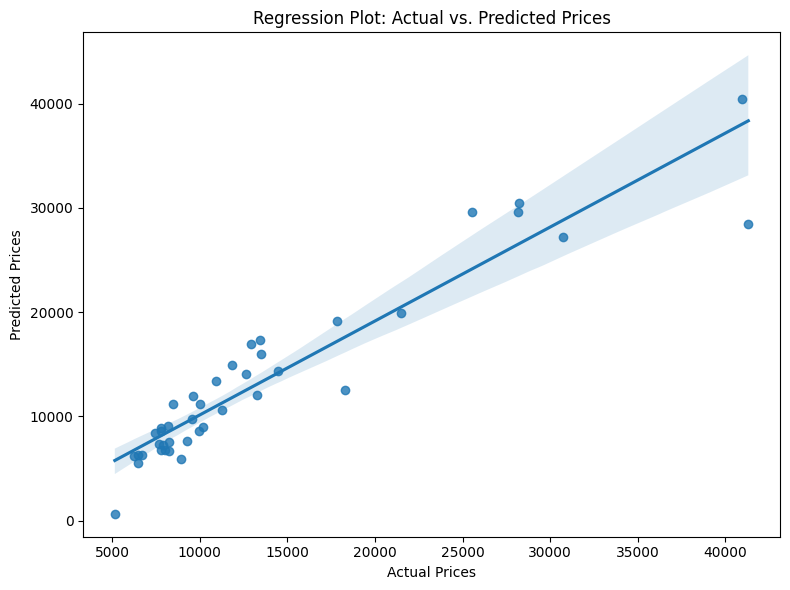

In [57]:
# Create a regression plot (scatter plot with a regression line)
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Regression Plot: Actual vs. Predicted Prices')
plt.tight_layout()

# Show plots
plt.show()

In [58]:
#Sample prediction
y_test.loc[100]

price    9549.0
Name: 100, dtype: float64

In [61]:
sample=X_test.loc[100]
sample_reshaped = sample.values.reshape(1, -1)
best_model.predict(sample_reshaped)

C:\Users\laxmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


array([[9741.22235114]])

The dataset consits of only 205 rows. Model accuracy can be improved by providing more rows of sample data.More data allows the model to capture a broader range of scenarios and situations that may be present in the real world. This helps the model learn more robust and accurate patterns, leading to better predictions on new data.